In [ ]:
#!pip install pandas seaborn matplotlib numpy

In [1]:
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv('Student_performance_data _.csv')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


(2392, 15)


<Axes: >

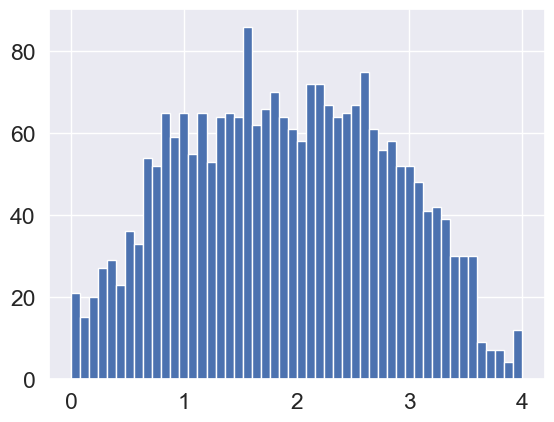

In [14]:
print(df.shape)
df.GPA.hist(bins=50)

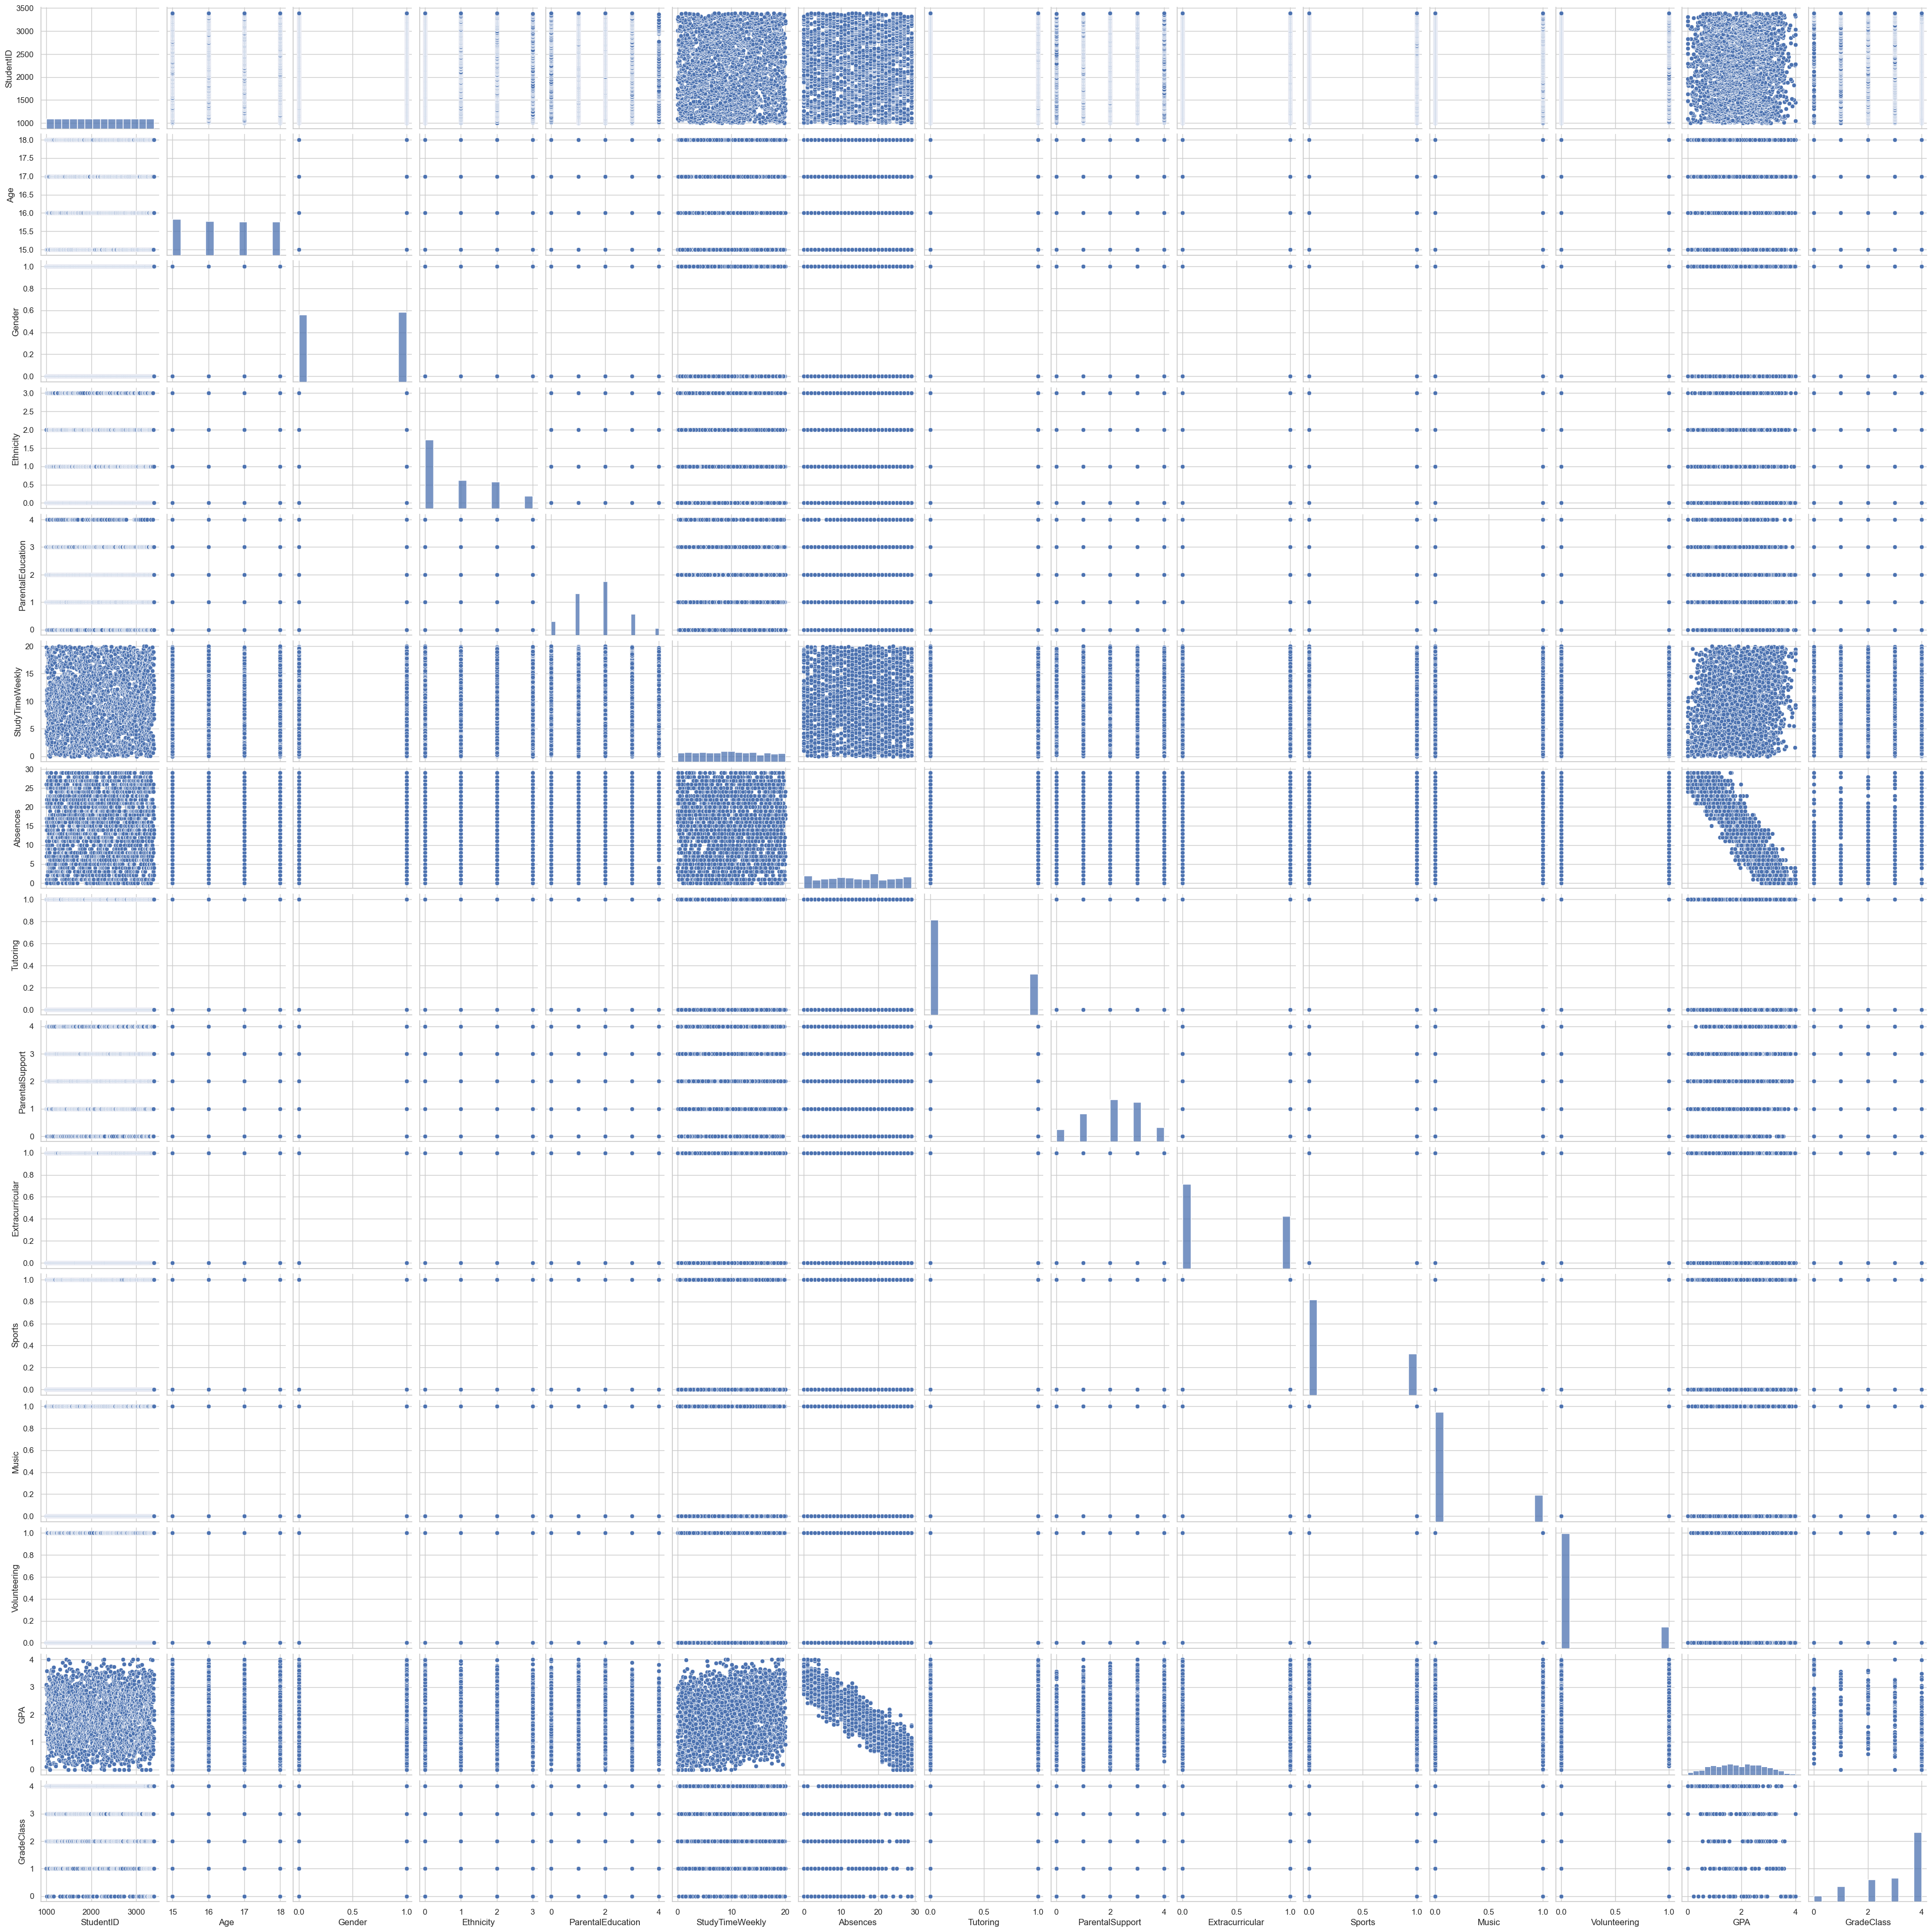

In [4]:
sns.pairplot(df, height=2.5)
plt.show()

Reduciendo a las graficas de importancia

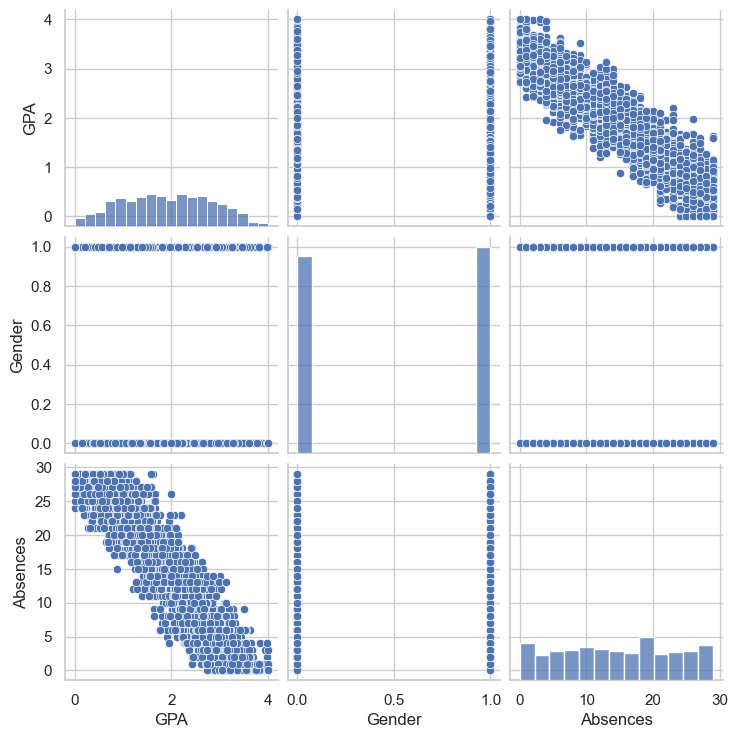

In [5]:
df_reduced = df[['GPA','Gender','Absences']]
sns.pairplot(df_reduced, height=2.5)
plt.show()

<Axes: >

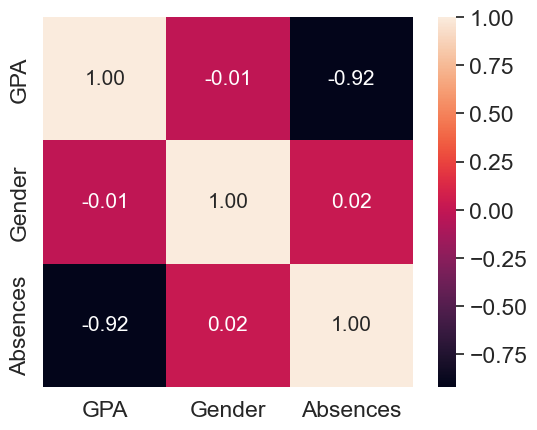

In [6]:
numeric_cols = ['GPA','Gender','Absences']
cm = np.corrcoef(df_reduced[numeric_cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=numeric_cols, xticklabels=numeric_cols)

In [ ]:
#!pip install scikit-learn

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
x_cols = list(set(df_reduced.columns) - set(['GPA']))
y_col = ['GPA']

x = df_reduced[x_cols].values
y = df_reduced[y_col].values

x_train, x_test, y_train, y_test = train_test_split(x, y)
sc_x = StandardScaler().fit(x)
sc_y = StandardScaler().fit(y)

x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [9]:
y_pred.shape

(598, 1)

Empezando a revisar las metricas
===============================
MSE: Mientras mas bajo, mejor
R2: entre 75 - 95 esta bien

In [10]:
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)

print(r2)
print(mse.round(4))






0.847018012731356
0.1582


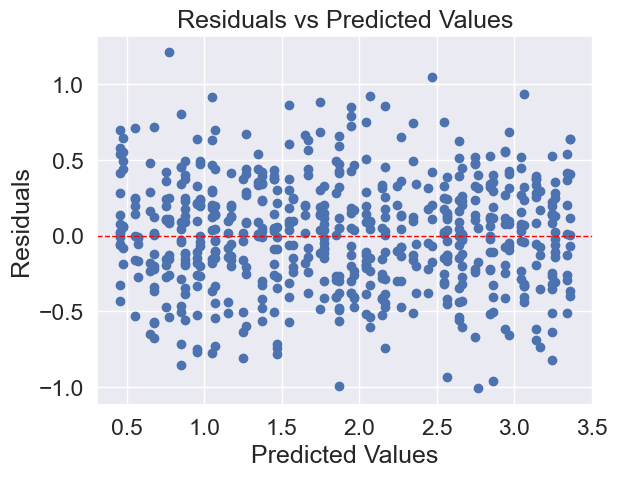

In [12]:
# Visualizar los residuos
y_test_rescaled = sc_y.inverse_transform(y_test)
y_pred_rescaled = sc_y.inverse_transform(y_pred)

residuals = y_test_rescaled - y_pred_rescaled
plt.scatter(y_pred_rescaled, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.show()

In [ ]:
#!pip install statsmodels

In [13]:
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)
x_test_sm = sm.add_constant(x_test)


model_sm = sm.OLS(y_train, x_train_sm).fit()


print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     4863.
Date:                Sun, 14 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:58:18   Log-Likelihood:                -865.92
No. Observations:                1794   AIC:                             1738.
Df Residuals:                    1791   BIC:                             1754.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0029      0.009     -0.316      0.7